In [229]:
import pandas as pd
import numpy as np
import matplotlib as plt
from env import host, username, password
from pydataset import data

url = f'mysql+pymysql://{username}:{password}@{host}/employees'

In [22]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [23]:
#Demo for 1: 

def get_db_url(username,password,host,db_name):
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
get_db_url(username,password,host, 'Mammals')
mammals_url = get_db_url(username,password,host,'Mammals')

In [24]:
#1.) Create a function named get_db_url. It should accept a username, hostname, password, and database name and 
#return a url connection string formatted like in the example at the start of this lesson.

def get_db_url(username,password,host,db_name):
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
url =  get_db_url(username,password,host, 'employees')


In [25]:
def get_db_url(username,password,host,db_name):
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
get_db_url(username,password,host, 'Mammals')
mammals_url = get_db_url(username,password,host, 'Mammals')

In [26]:
#2.) Use your function to obtain a connection to the employees database.
get_db_url(username,password,host, 'employees')
emp_url = get_db_url(username,password,host, 'employees')
pd.read_sql('select * from employees limit 5', emp_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [16]:
#3a.) Intentionally make a typo in the database url. What kind of error message do you see? Operational Error
emp_url = get_db_url(username,password,host, 'elployees')
pd.read_sql('select * from employees limit 5', emp_url)

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'florence02'@'%' to database 'elployees'")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [18]:
#3b.)  Intentionally make an error in your SQL query. What does the error message look like? programming error
emp_url = get_db_url(username,password,host, 'employees')
pd.read_sql('select all from employees limit 5', emp_url)

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'from employees limit 5' at line 1")
[SQL: select all from employees limit 5]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [27]:
#4.) Read the employees and titles tables into two separate DataFrames.
titles_df = pd.read_sql('select * from titles', emp_url)
titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [28]:
employees_df = pd.read_sql('select * from employees', emp_url)
employees_df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [ ]:
#5.) How many rows and columns do you have in each DataFrame? Is that what you expected?
#There are 443,308 rows in the title dataframe, and 300024 rows in the employees data frame. I was expecting it.


In [29]:
#6.) Display the summary statistics for each DataFrame.
employees_df.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [30]:
#6.) Display the summary statistics for each DataFrame.
titles_df.describe()

,emp_no
count,443308.000000
mean,253075.034430
std,161853.292613
min,10001.000000
25%,84855.750000
50%,249847.500000
75%,424891.250000
max,499999.000000


In [31]:
#7.) How many unique titles are in the titles DataFrame?
emp_url = get_db_url(username,password,host, 'employees')
len(pd.read_sql('select distinct title from titles', emp_url))
#7 unique titles

7

In [32]:
#8.) What is the oldest date in the to_date column? 1985-03-01

pd.read_sql('select to_date from titles order by to_date asc limit 1', emp_url)

,to_date
0,1985-03-01


In [33]:
#9.) What is the most recent date in the to_date column? 2002-08-01
pd.read_sql('select to_date from titles where to_date < now() order by to_date desc limit 1', emp_url)

,to_date
0,2002-08-01


#Exercise 2

In [ ]:
!jt -t onedork #sorry was trying a new theme 

In [9]:
#1.) Copy the users and roles DataFrames from the examples above.
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
print(users)

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

   id   name  role_id
0   1    bob      1.0
1   2    joe      2.0
2   3  sally      3.0
3   4   adam      3.0
4   5   jane      NaN
5   6   mike      NaN


,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [41]:
#2.) What is the result of using a right join on the DataFrames?
users.merge(roles, left_on='role_id', right_on='id', how='right', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


In [35]:
#3.) What is the result of using an outer join on the DataFrames?
users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)


,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [49]:
#4.) What happens if you drop the foreign keys from the DataFrames and try to merge them
#Adam is reviewer not a commenter
noforeignkey_users = users.drop(columns='role_id')
noforeignkey_users

pd.merge(noforeignkey_users, roles, on='id')

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter


In [51]:
users.merge(roles,how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


In [45]:
#5.) Load the mpg dataset from PyDataset.
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [50]:
#6.) Output and read the documentation for the mpg dataset.
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [52]:
#7.) How many rows and columns are in the dataset? 234 rows, 11 columns


In [81]:
#8.) Check out your column names and perform any cleanup you may want on them.
mpg_df = mpg
mpg_df=mpg_df.rename(columns={'cty': 'city'})
mpg_df=mpg_df.rename(columns={'hwy': 'highway'})
mpg_df=mpg_df.rename(columns={'trans': 'transmission'})
mpg_df=mpg_df.rename(columns={'displ': 'displacement'})

mpg_df=mpg_df.rename(columns={'cty': 'city',
                               'hwy': 'highway',
                            'trans': 'transmission',
                            'displ': 'displacement'})

In [58]:
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [59]:
#9.) Display the summary statistics for the dataset.
mpg_df.describe()


,displacement,year,cyl,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [67]:
#10.) How many different manufacturers are there?
len(set(mpg_df['manufacturer']))

15

In [69]:
len(mpg_df.manufacturer.unique())

15

In [71]:
#11.) How many different models are there?
len(mpg_df.model.unique())



38

In [82]:
#12.) Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain
#the difference between highway and city mileage for each car.
mpg_df['mileage_difference'] = mpg_df.highway - mpg_df.city
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


In [83]:
#13.) Create a column named average_mileage like you did in the DataFrames exercises; 
#this is the mean of the city and highway mileage.
mpg_df['average_mileage'] = (mpg_df.highway + mpg_df.city)/2
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


In [99]:
#14.) Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car 
#has an automatic transmission.
mpg_df['is_automatic'] = mpg_df.transmission.str.contains('auto')
#or
mpg_df['is_automatic'] = mpg_df.transmission.str.startswith('auto')
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [243]:
#15.) Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?
mpg_df.groupby('manufacturer').average_mileage.mean().sort_values().nlargest(1, keep='all')
mpg_df.groupby('manufacturer').average_mileage.agg('mean').nlargest(1)

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

In [107]:
#16.) Do automatic or manual cars have better miles per gallon?
mpg_df.groupby('is_automatic').average_mileage.mean()

#manual has better miles per gallon

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

# Exercise 3

In [251]:
#1.)Use your get_db_url function to help you explore the data from the chipotle database.


get_db_url(username,password,host, 'chipotle')
chipotle_url = get_db_url(username,password,host, 'chipotle')
orders_df = pd.read_sql('select * from orders', chipotle_url)

In [252]:
#2.) What is the total price for each order?
orders_df
orders_df.item_price = orders_df.item_price.str.replace('$','').str.replace(',','').astype('float')
orders_df.groupby('order_id').item_price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [225]:
#3.) What are the most popular 3 items?
orders_df.groupby('item_name').quantity.sum().sort_values(ascending = False).nlargest(3, keep='all')

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [254]:
#4.) Which item has produced the most revenue?
orders_df.groupby('item_name').item_price.sum().nlargest(1,keep='all')

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [191]:
#5.) Using the titles DataFrame, visualize the number of employees with each title.
get_db_url(username,password,host,'employees')
employees_url = get_db_url(username,password,host,'employees')
titles_df = pd.read_sql('select * from titles', employees_url)
titles_df.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


<AxesSubplot:title={'center':'Employee Titles'}, xlabel='title'>

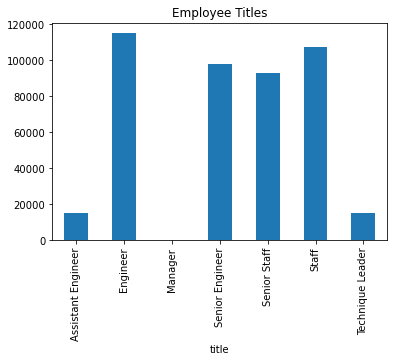

In [195]:
titles_df.groupby('title').emp_no.count().plot.bar(title = 'Employee Titles')

In [198]:
#6.) Join the employees and titles DataFrames together.
employees_df.merge(titles_df,how='outer')
employees_titles_df = employees_df.merge(titles_df,how='outer')

<AxesSubplot:title={'center':'Title Changing During Job'}>

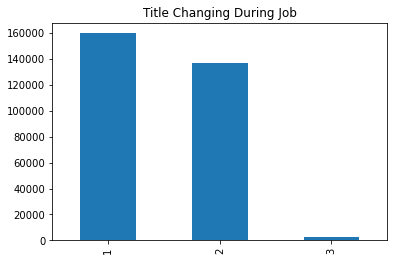

In [240]:
#7.) Visualize how frequently employees change titles.
employees_titles_df.groupby('emp_no').title.count().value_counts().plot.bar(
    title = 'Title Changing During Job') 

In [232]:
#8.) For each title, find the hire date of the employee that was hired most recently with that title.
employees_titles_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [247]:
#9.) Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)
titles_and_departments = '''
select * from employees
join dept_emp using(emp_no)
join titles using(emp_no)
join departments using(dept_no)
'''
titles_and_departments_df = pd.read_sql(titles_and_departments,employees_url)
pd.crosstab(titles_and_departments_df.title, titles_and_departments.dept_name)

AttributeError: 'str' object has no attribute 'dept_name'